In [27]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [28]:
class Agente:
    """ Agente general """
    def __init__(self, tipo, locacion=np.array([0,0])):
        self.tipo = tipo
        self.locacion = locacion
        self.siguiente_accion = None

    def distancia(self, otro):
        "Calcula la distancia euclídea entre este agente y otro."
        return np.linalg.norm(self.locacion - otro.locacion)  # Otra manera es usar np.sqrt(np.sum((a-b)**2))
    
    def vecinos(self, agentes):
        pass
    
    def actuar(self, agentes):
        self.locacion =  self.siguiente_accion
        
    def decidir(self, agentes):
        self.siguiente_accion = np.array([random.uniform(0, 1), random.uniform(0, 1)]) # Toma una nueva posición al azar
    
    def actualizar(self, agentes):
        self.decidir(agentes)
        self.actuar(agentes)

In [29]:
class habitante(Agente):
    """
    Aquí se encuentra el registro de los habitantes de Sugarscape.
    Su lugar de nacimiento y sus características individuales.
    """
    def __init__(self, habitantes):       
        #Registro de los habitantes de Sugarscape
        self.id = np.array(range(habitantes))
        
        #Lugar de nacimiento de los habitantes
        self.x = np.random.randint(0,51,habitantes)
        self.y = np.random.randint(0,51,habitantes)
        self.locacion = np.array([self.x, self.y])
        
        Agente.__init__(self, tipo = 'habitante', locacion = np.array([self.x,self.y]))
        
        #Atributos
        self.metabolismo = np.random.randint(1,5,habitantes)
        self.vision = np.random.randint(1,6,habitantes)
        self.edad = np.random.randint(60,101, habitantes)
        self.ingreso = np.random.randint(5,26, habitantes)
        self.sexo = np.random.randint(0,2,2)
        self.direccion = np.array([])
        self.vivo = True
        self.hambre = 10
        self.azucar = 0
        self.especia = 0
    
    def decision(self, agentes):
        distancia_menor = self.distancia(Bien[0])
        i = 0
        for Bien in Bienes:
            if self.distancia(Bien) < distancia_menor: #Se busca el bien mas cercano 
                distancia_menor = self.distancia(Bien)
                if (self.locacion[0] == Bien.locacion[0]):
                    self.direccion_X = 0
                elif (self.locacion[0] < Bien.locacion[0]):
                    self.direccion_X = 1
                else:
                    self.direccion_X = -1
                if (self.locacion[1] == Bien.locacion[1]):
                    self.direccion_Y = 0
                elif (self.locacion[1] < Bien.locacion[1]):
                    self.direccion_Y = 1
                else:
                    self.direccion_Y = -1
                self.direccion = [self.direccion_X,self.direccion_Y]
            i = i + 1
        if(self.direccion() == np.array([0,0])):
            self.agarrar(i) #Se recolecta el bien mas cercano si es que ya esta en cima de el 
        return self.direccion

    def actualizar(self, agentes):
        self.moverse() #Lo primero que hace es moverse
        self.hambre = self.hambre - 1 #Despues de moverse se le baja el hambre
        self.edad = self.edad + 1 #Aumenta su edad
        self.comer() #Si se cumplen ciertas necesidades el habitante come
        if self.hambre == 0 or self.edad == self.edad_maxima: #Se comprueba si muere por edad o por hambre
            self.vivo = False
            self.nuevos_habitantes() #Si si deberia morir posiblemente se crean nuevos habitantes
        if self.hambre == 10: #Si su hambre esta al maximo, puede reproducirce
            if np.random.randint(1,6) == 4:
                x = np.random.randint(0,51,habitantes)
                y = np.random.randint(0,51,habitantes)
                self.locacion = np.array([self.x, self.y])
                Agente.__init__(self, tipo = 'habitante', locacion = np.array([x,y]))
          
    def nuevos_habitantes(self): #Solo se llama esta funcion si es que muere un habitante
            cantidad = np.random.randint(0,2)
            mov_x = np.random.randint(1,3)
            mov_y = np.random.randint(1,3)
            if (cantidad != 0):
                for i in range(cantidad):
                    x = self.locacion + mov_x #Los nuevos habitantes apareceran cerca de el ultimo
                    y = self.locacion + mov_y
                    Agente.__init__(self, tipo = 'habitante', locacion = np.array([x,y]))
        
    def agarrar(self, num_bien): #Agarra el bien que esta en la misma celda que el habitante
            if(Bienes[num_bien].tipo == 1):
                self.azucar = self.azucar + 1
            else:
                self.especia = self.especia + 1
            np.delete(Bienes, num_bien)
                
    def comer(self): #Si se cumplen ciertas necesidades el habitante come
        if(self.hambre < 5 and self.azucar > 1):
                self.hambre = self.hambre + 5
                self.azucar = self.azucar - 1
        elif(self.hambre < 7 and self.especia > 1):
                self.hambre = self.hambre + 3
                self.especia = self.especia - 1 

    def moverse(self, agentes):
        self.locacion = self.locacion + self.decision() #Se mueve en direccin al bien mas cercano

In [34]:
class Bienes():
    def __init__(self, tipo, ):
        self.locacion = np.array([random.uniform(0, 1), random.uniform(0, 1)]) #Posición al azar inicial
        self.tipo = tipo #Tipo 0 Especia, Tipo 1 Azucar
        if (self.tipo == 0):
            self.valor_nutrimental = 3
        if (self.tipo == 1):
            self.valor_nutrimental = 5

In [31]:
class Mundo:
    def __init__(self, habitantes, bienes, steps, ancho = 51, alto = 51):
        self.habitantes = habitantes
        self.bienes = bienes
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        
        print ("Creado el mundo")
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos, = self.ax.plot([], [], 'o', **plot_args)
       
       
    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))
        
        return self.puntos,
       
    def actualizar(self, step):   
        self.dibujar(step) # Dibuja el mundo
        
        for agente in self.agentes:
            agente.actualizar(self.agentes)
    
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
        
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func=self.clean_screen, frames=self.steps, interval=1000, blit=False)
        return anim

In [36]:
class Sugarscape(Mundo):
    def __init__(self, c , Mundo):
        """
        c es la capacidad de azúcar de una celda, es decir, el valor
        máximo de unidades de azúcar que puede contener una celda.
        
        """
        
        self.ancho = Mundo.ancho
        self.alto = Mundo.alto
        self.steps = Mundo.steps
        self.habitantes = Mundo.habitantes
        self.bienes = Mundo.bienes
        self.size = (51,51)
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 51), ylim=(0, 51))
        
        #Propiedades de las parcelas de azúcar
        #Capacidad de azúcar por parcela/celda (aleatoria)
        self.capacidad = np.random.randint(0, c + 1, size = self.size)
        #Las unidades por parcela/celda
        self.level = np.random.randint(0, c + 1, size = self.size)
        #Para asegurar que la cantidad de unidades de azúcar por parcela
        #no excede la capacidad
        self.level = np.minimum.reduce([self.level,self.capacidad])
        #Habitantes y Azucares
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos_H, = self.ax.plot([], [], 'o', markerfacecolor='orange', **plot_args)
        self.puntos_B, = self.ax.plot([], [], 'o', markerfacecolor='green', **plot_args)
    
    def clean_screen(self):
        self.puntos_H.set_data([], [])
        self.puntos_B.set_data([], [])
        return 
    
    def dibujar(self,step): #Se dibujan los habitantes en naranja y los bienes con verde
   
        x_values_H, y_values_H = [], []
        x_values_B, y_values_B = [], []
        
        self.regenerar()
        
        for bien in self.bienes:
            x, y = bien.locacion
            x_values_B.append(x)
            y_values_B.append(y)
        
        for habitante in self.habitantes:
            x = habitante.x
            y = habitante.y
            x_values_H.append(x)
            y_values_H.append(y)

        self.puntos_H.set_data(x_values_H, y_values_H)
        self.puntos_B.set_data(x_values_B, y_values_B)
        
        self.ax.set_title('Paso {}'.format(step))

        return 
    
    def regeneracion(self): #Se decide al azar si se regenera el azucar
        reg = np.random.randint(0,3)
        rand = np.random.randint(0,1)
        if(reg > 0):
            for i in range(reg):
                bien_reg = Bienes(tipo = rand)
                self.bienes.append(bien_reg)
        

Creado el mundo


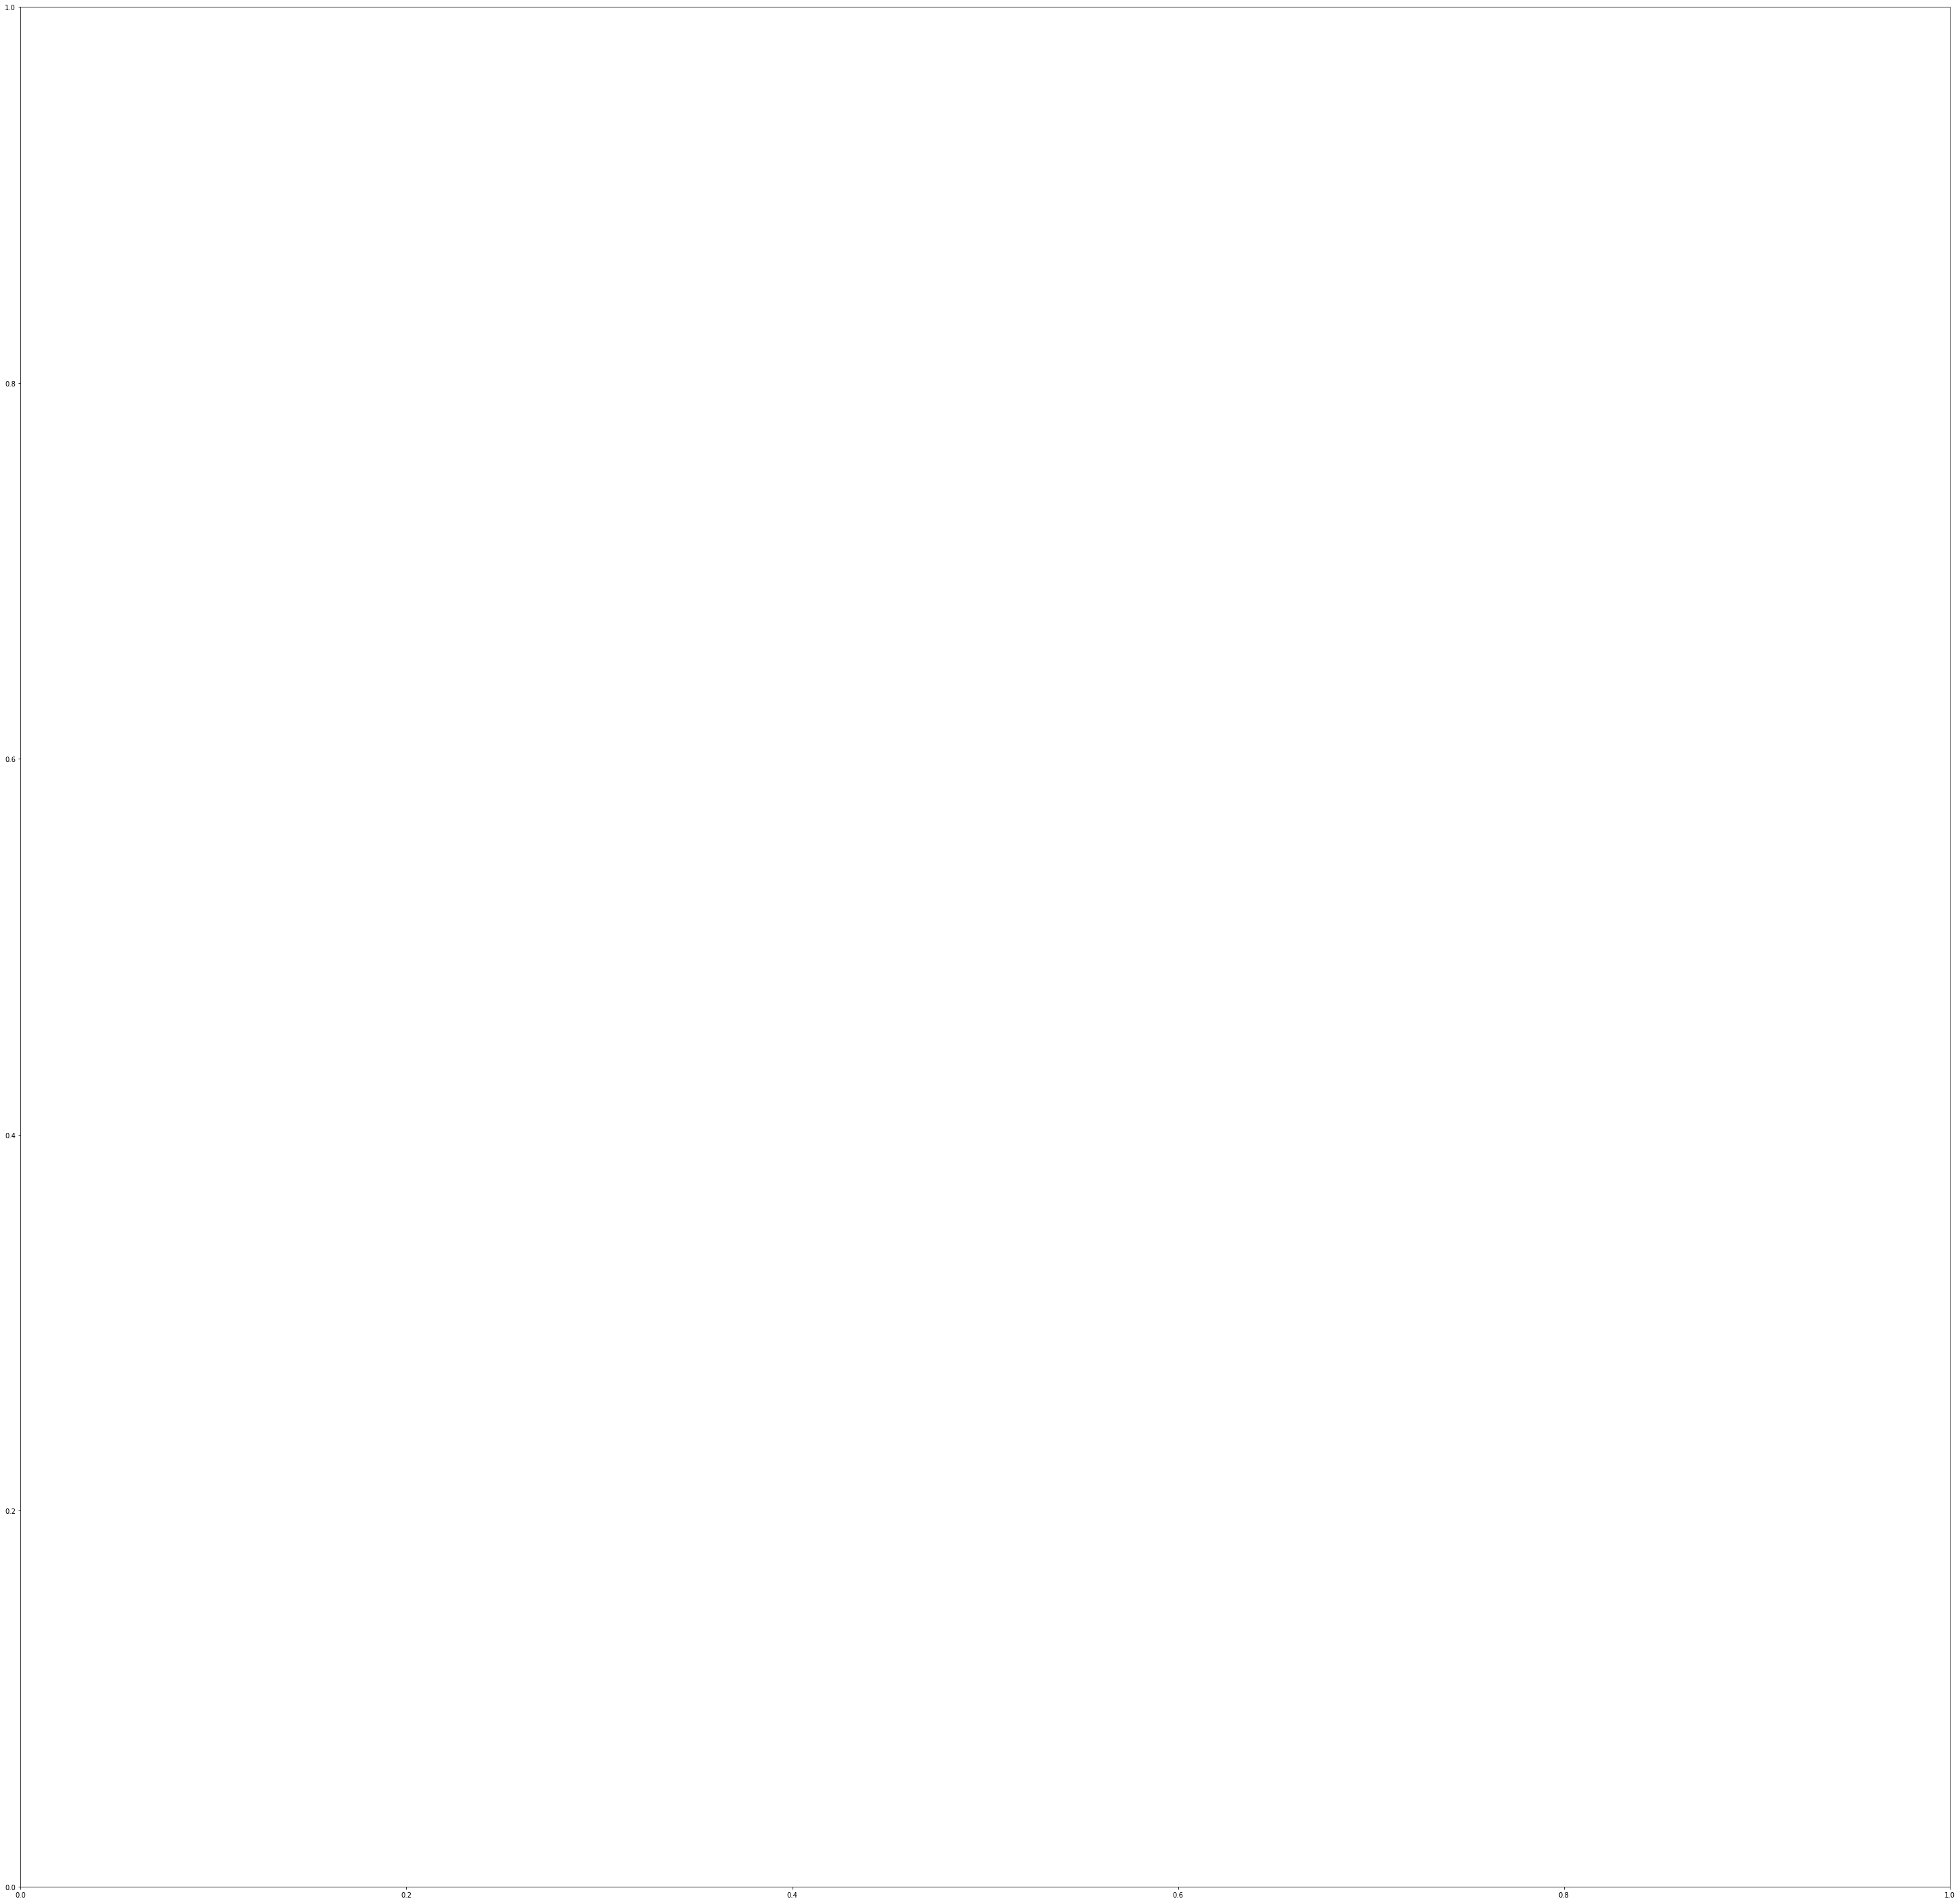

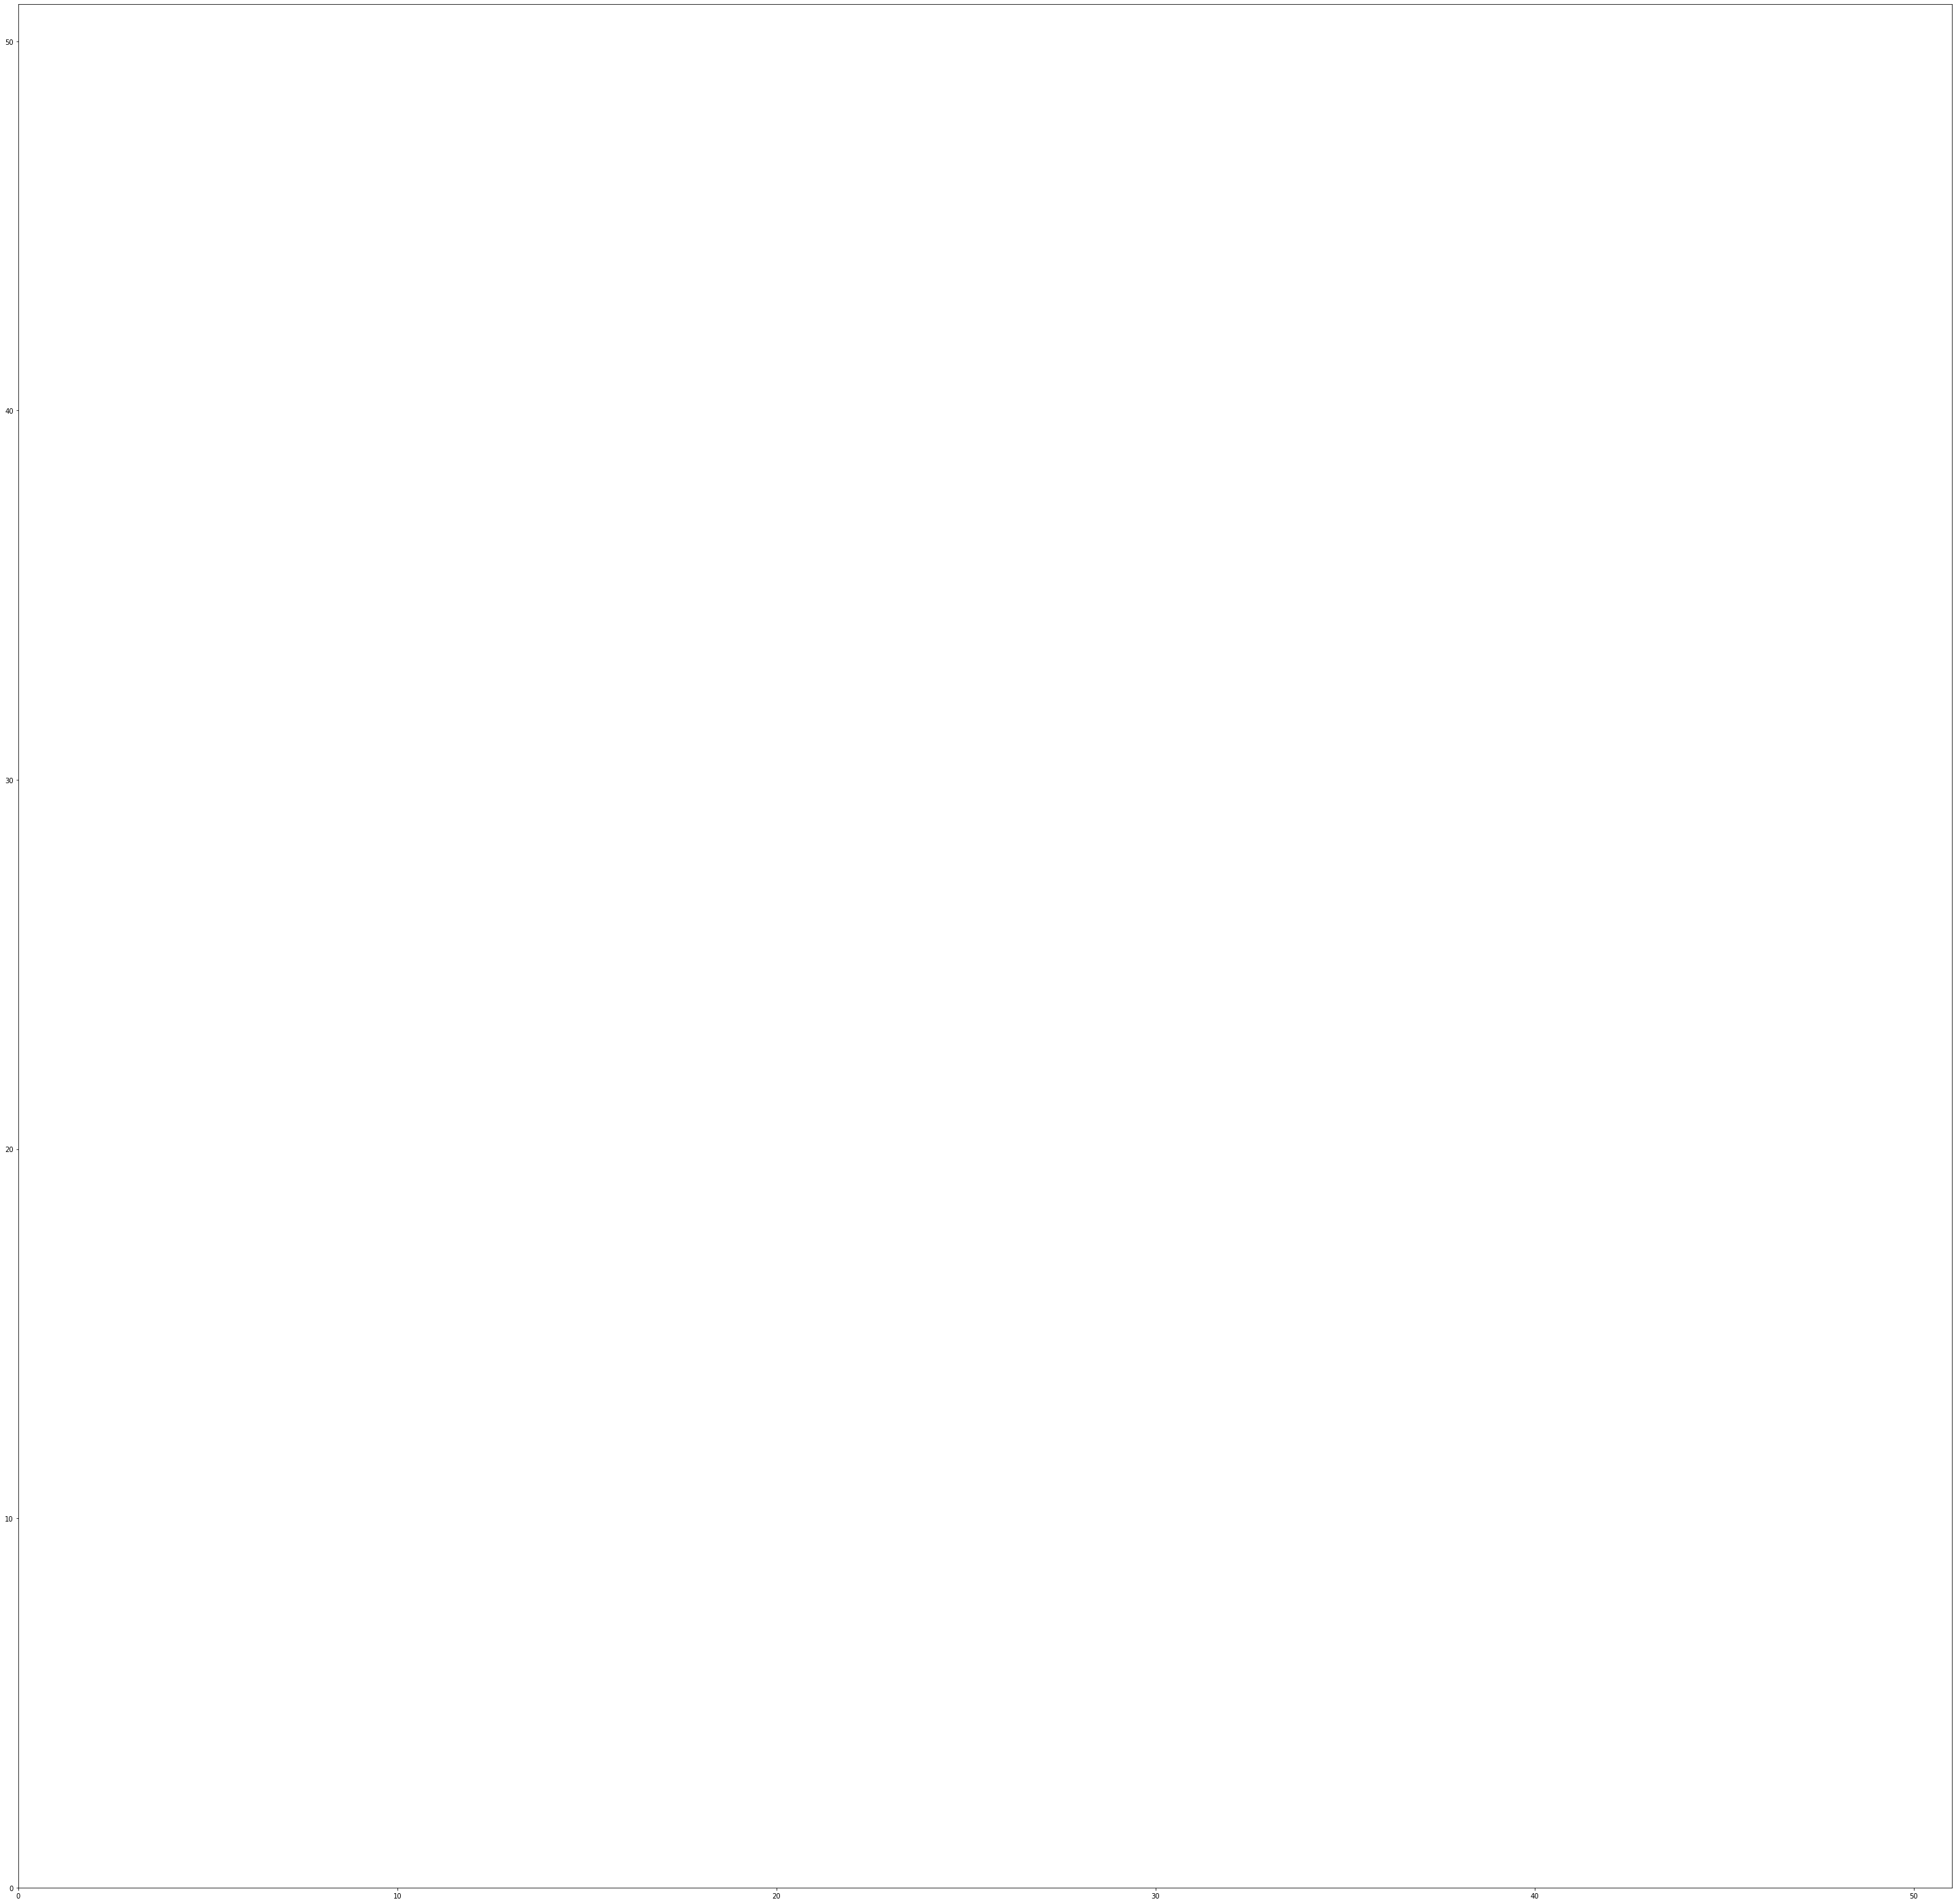

In [37]:
num_habitantes = 10
num_bienes = 10

Habitantes = [habitante for i in range(num_habitantes)]
bienes = [Bienes for i in range(num_bienes)]

mundo = Mundo(habitantes = Habitantes, bienes = bienes, steps = 10)
Mundo_azucarero = Sugarscape(5,mundo)

simulacion = Mundo_azucarero.simular()

In [26]:
HTML(simulacion.to_html5_video())

AttributeError: type object 'Bienes' has no attribute 'locacion'